In [18]:
pip install skimpy

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_curve, auc
import plotly.express as px
from skimpy import skim

In [20]:
import warnings
# Filtrer les avertissements
warnings.filterwarnings('ignore')

## PART 1 : EDA

In [21]:
df1 = pd.read_csv('marketing_campaign.csv', sep=";")

In [22]:
skim(df1)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2241   │ │ float64     │ 25    │                                                          │
│ │ Number of columns │ 29     │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column         ┃ NA ┃ NA %           ┃ mean     ┃ sd      ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ID             │  1 │ 0.044622936189 │     5592 │    3247 │    0 │  2828 │  5458 │  8428 │  11190 │ ▇███▆█ │  │
│ │                │    │          20125 │          │         │      │       │       │       │        │        │  │
│ │ Year_Birth     │  1 │ 0.044622936189 │     1969 │   11.98 │ 1893 │  1959 │  1970 │  1977 │   1996 │    ▅█▃ │  │
│ │                │    │          20125 │          │         │      │       │       │       │        │        │  │
│ │ Income         │ 25 │ 1.115573404730 │    52250 │   25170 │ 1730 │ 35300 │ 51380 │ 68520 │ 666700 │   █    │  │
│ │                │    │           0312 │          │         │      │       │       │       │        │        │  │
│ │ Kidhome        │  1 │ 0.044622936189 │   0.4442 │  0.5384 │    0 │     0 │     0 │     1 │      2 │  █  ▆  │  │
│ │                │    │          20125 │          │         │      │       │       │       │        │        │  │
│ │ Teenhome       │  1 │ 0.044622936189 │   0.5062 │  0.5445 │    0 │     0 │     0 │     1 │      2 │  █  ▇  │  │
│ │                │    │          20125 │          │         │      │       │       │       │        │        │  │
│ │ Recency        │  1 │ 0.044622936189 │    49.11 │   28.96 │    0 │    24 │    49 │    74 │     99 │ ██▇███ │  │
│ │                │    │          20125 │          │         │      │       │       │       │        │        │  │
│ │ MntWines       │  1 │ 0.044622936189 │    303.9 │   336.6 │    0 │ 23.75 │ 173.5 │ 504.2 │   1493 │ █▂▂▁▁  │  │
│ │                │    │          20125 │          │         │      │       │       │       │        │        │  │
│ │ MntFruits      │  1 │ 0.044622936189 │     26.3 │   39.77 │    0 │     1 │     8 │    33 │    199 │  █▁▁   │  │
│ │                │    │          20125 │          │         │      │       │       │       │        │        │  │
│ │ MntMeatProduct │  1 │ 0.044622936189 │    166.9 │   225.7 │    0 │    16 │    67 │   232 │   1725 │  █▁▁   │  │
│ │ s              │    │          20125 │          │         │      │       │       │       │        │        │  │
│ │ MntFishProduct │  1 │ 0.044622936189 │    37.53 │   54.63 │    0 │     3 │    12 │    50 │    259 │  █▁▁   │  │
│ │ s              │    │          20125 │          │         │      │       │       │       │        │        │  │
│ │ MntSweetProduc │  1 │ 0.044622936189 │    27.06 │   41.28 │    0 │     1 │     8 │    33 │    263 │  █▁▁   │  │
│ │ ts             │    │          20125 │          │         │      │       │       │       │        │        │  │
│ │ MntGoldProds   │  1 │ 0.044622936189 │    44.02 │   

In [23]:
df1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524.0,1957.0,Graduation,Single,58138.0,0.0,0.0,2012-09-04,58.0,635.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1
1,2174.0,1954.0,Graduation,Single,46344.0,1.0,1.0,2014-03-08,38.0,11.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
2,4141.0,1965.0,Graduation,Together,71613.0,0.0,0.0,2013-08-21,26.0,426.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
3,6182.0,1984.0,Graduation,Together,26646.0,1.0,0.0,2014-02-10,26.0,11.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
4,5324.0,1981.0,PhD,Married,58293.0,1.0,0.0,2014-01-19,94.0,173.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236,4001.0,1946.0,PhD,Together,64014.0,2.0,1.0,2014-06-10,56.0,406.0,...,7.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,11.0,0
2237,7270.0,1981.0,Graduation,Divorced,56981.0,0.0,0.0,2014-01-25,91.0,908.0,...,6.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,11.0,0
2238,8235.0,1956.0,Master,Together,69245.0,0.0,1.0,2014-01-24,8.0,428.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
2239,9405.0,1954.0,PhD,Married,52869.0,1.0,1.0,2012-10-15,40.0,84.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1


In [24]:
df1.isna().sum()

,0
ID,1
Year_Birth,1
Education,1
Marital_Status,1
Income,25
Kidhome,1
Teenhome,1
Dt_Customer,1
Recency,1
MntWines,1


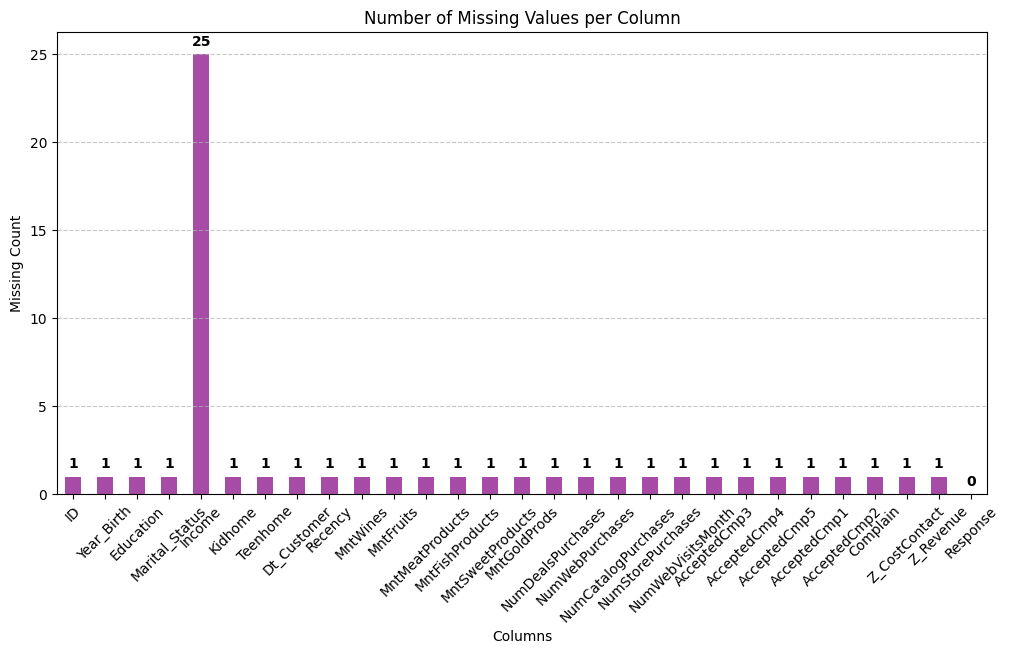

In [25]:
missing_values = df1.isnull().sum()
df1.isna().sum().plot(kind="bar", figsize=(12, 6), color="purple", alpha=0.7)
plt.title("Number of Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Missing Count")
plt.xticks(rotation=45)
 # Affiche les valeurs au-dessus des barres
for i, v in enumerate(missing_values):
        plt.text(i, v+0.5, str(v), ha='center', fontsize=10, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [26]:
df1['Income'].fillna(df1['Income'].median(), inplace=True)

In [27]:
# Création de la variable Age
df1['Age'] = 2025 - df1['Year_Birth']
# Ancienneté
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'], format='%Y-%m-%d', errors='coerce')
df1['Seniority'] = 2025 - df1['Dt_Customer'].dt.year

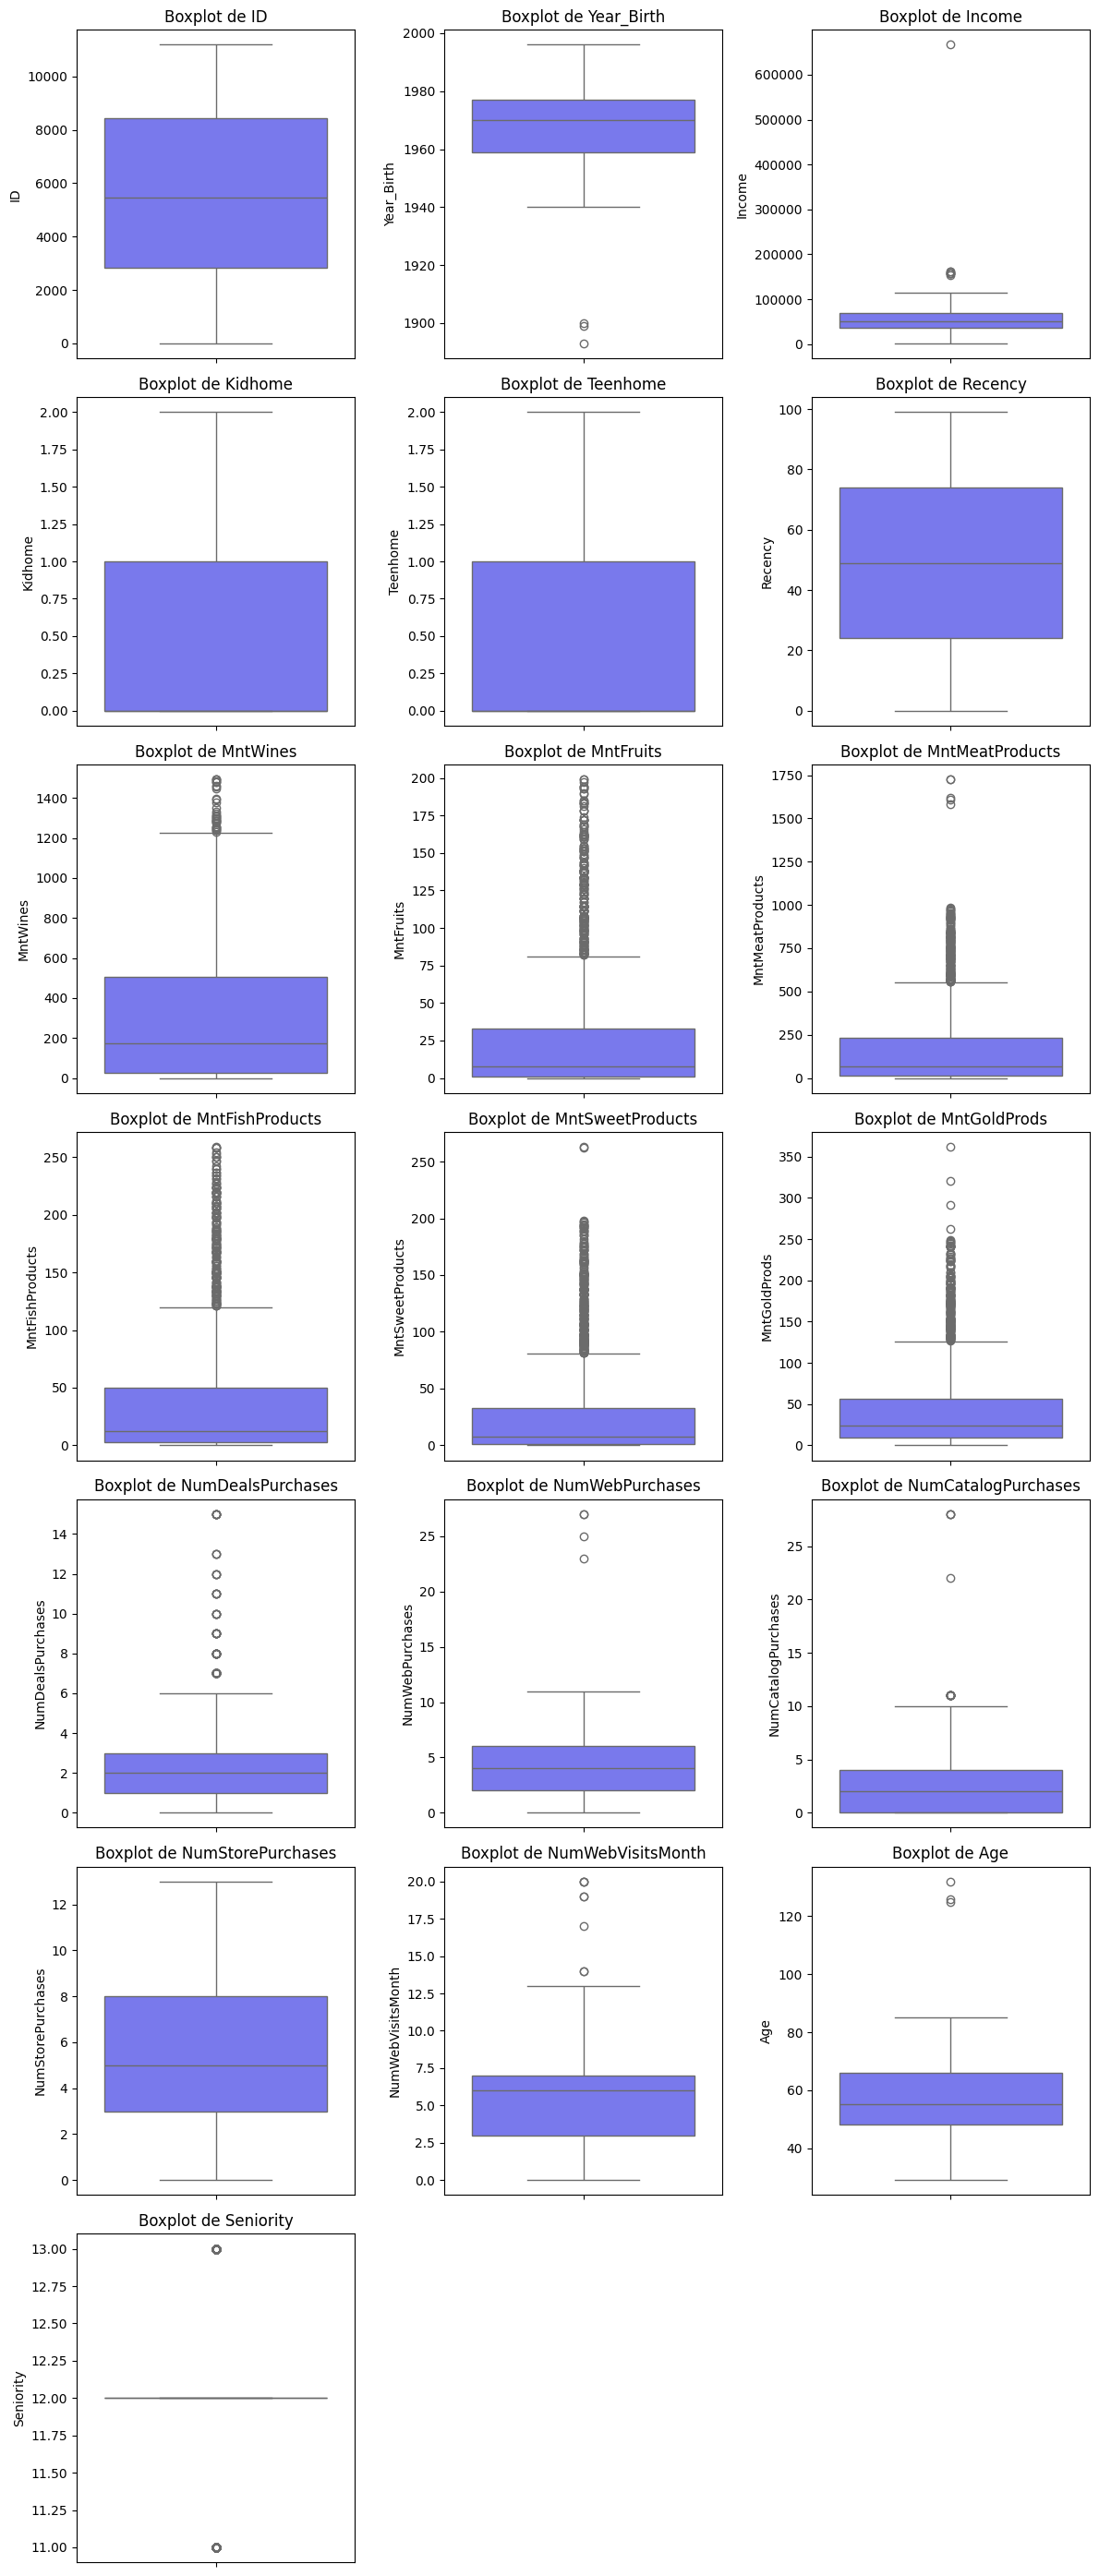

In [28]:
# Filtrer uniquement les colonnes numériques ayant **plus de 2 valeurs uniques**
numeric_columns = [
    col for col in df1.select_dtypes(include=['number']).columns
    if df1[col].nunique() > 2
]

# Vérifier qu'il reste des colonnes valides
if not numeric_columns:
    print("Aucune colonne valide pour le boxplot !")
else:
    # Définir le nombre de colonnes et lignes pour l'affichage
    cols = 3  # Nombre de colonnes dans la grille
    rows = -(-len(numeric_columns) // cols)  # Arrondi vers le haut

    # Créer une figure avec plusieurs subplots
    fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))

    # Aplatir 'axes' pour éviter les erreurs d'indexation
    axes = axes.flatten() if len(numeric_columns) > 1 else [axes]

    # Boucle pour tracer un boxplot pour chaque colonne sélectionnée
    for i, col in enumerate(numeric_columns):
        sns.boxplot(data=df1, y=col, ax=axes[i], color="#6666FF")
        axes[i].set_title(f"Boxplot de {col}")

    # Supprimer les axes vides si le nombre de graphes est impair
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Ajuster l'affichage
    plt.tight_layout()
    plt.show()

Distribution before cleaning the outliers:


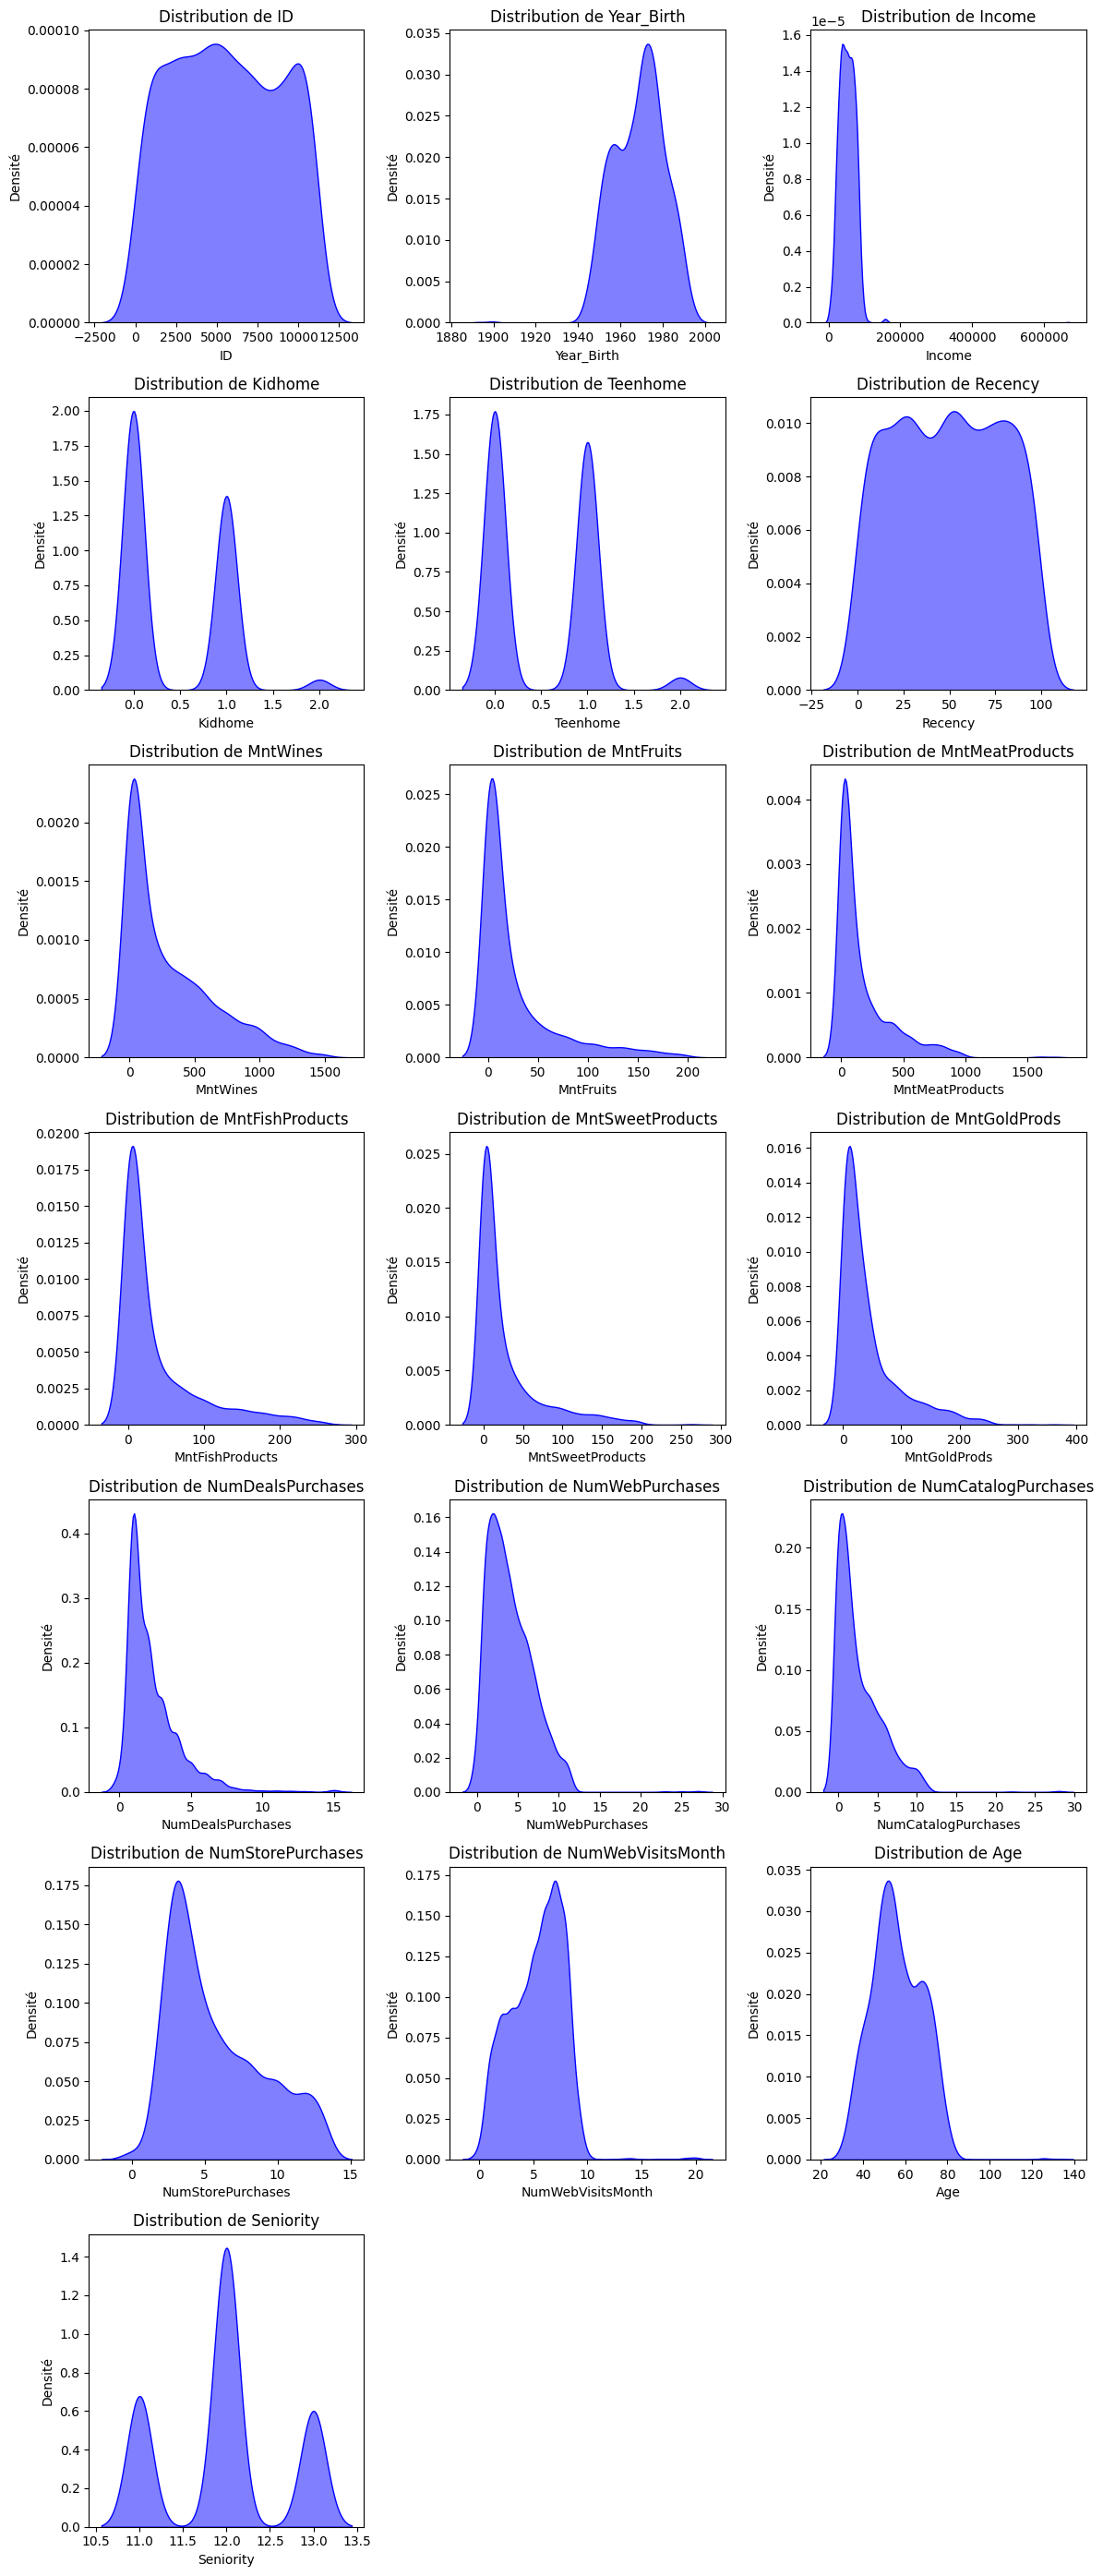

In [29]:
# Filtrer uniquement les colonnes numériques ayant plus de 2 valeurs uniques
numeric_columns = [
    col for col in df1.select_dtypes(include=['number']).columns
    if df1[col].nunique() > 2
]

# Vérifier qu'il reste des colonnes valides
if not numeric_columns:
    print("Aucune colonne valide pour le tracé des courbes !")
else:
    # Définir le nombre de colonnes et lignes pour l'affichage
    cols = 3  # Nombre de colonnes dans la grille
    rows = -(-len(numeric_columns) // cols)  # Arrondi vers le haut

    # Créer une figure avec plusieurs subplots
    fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))

    # Aplatir 'axes' pour éviter les erreurs d'indexation
    axes = axes.flatten() if len(numeric_columns) > 1 else [axes]

    # Boucle pour tracer une courbe de distribution pour chaque colonne sélectionnée
    for i, col in enumerate(numeric_columns):
        sns.kdeplot(df1[col], ax=axes[i], fill=True, color="blue", alpha=0.5)
        axes[i].set_title(f"Distribution de {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Densité")

    # Supprimer les axes vides si le nombre de graphes est impair
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Ajuster l'affichage
    print('Distribution before cleaning the outliers:')
    plt.tight_layout()
    plt.show()

In [30]:
# Suppression des valeurs aberrantes
features = ['Income', 'Age', 'Recency', 'MntWines', "MntFruits", 'MntMeatProducts', 'MntGoldProds','NumDealsPurchases', 'MntFishProducts', 'NumWebPurchases', 'NumStorePurchases']
Q1 = df1[features].quantile(0.25)
Q3 = df1[features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df1_cleaned = df1[~((df1[features] < lower_bound) | (df1[features] > upper_bound)).any(axis=1)]

In [31]:
df1_cleaned

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Seniority
1,2174.0,1954.0,Graduation,Single,46344.0,1.0,1.0,2014-03-08,38.0,11.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,71.0,11.0
2,4141.0,1965.0,Graduation,Together,71613.0,0.0,0.0,2013-08-21,26.0,426.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,60.0,12.0
3,6182.0,1984.0,Graduation,Together,26646.0,1.0,0.0,2014-02-10,26.0,11.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,41.0,11.0
4,5324.0,1981.0,PhD,Married,58293.0,1.0,0.0,2014-01-19,94.0,173.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,44.0,11.0
5,7446.0,1967.0,Master,Together,62513.0,0.0,1.0,2013-09-09,16.0,520.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,58.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372.0,1974.0,Graduation,Married,34421.0,1.0,0.0,2013-07-01,81.0,3.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,51.0,12.0
2237,7270.0,1981.0,Graduation,Divorced,56981.0,0.0,0.0,2014-01-25,91.0,908.0,...,1.0,0.0,0.0,0.0,0.0,3.0,11.0,0,44.0,11.0
2238,8235.0,1956.0,Master,Together,69245.0,0.0,1.0,2014-01-24,8.0,428.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,69.0,11.0
2239,9405.0,1954.0,PhD,Married,52869.0,1.0,1.0,2012-10-15,40.0,84.0,...,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1,71.0,13.0


Distribution after cleaning the outliers :


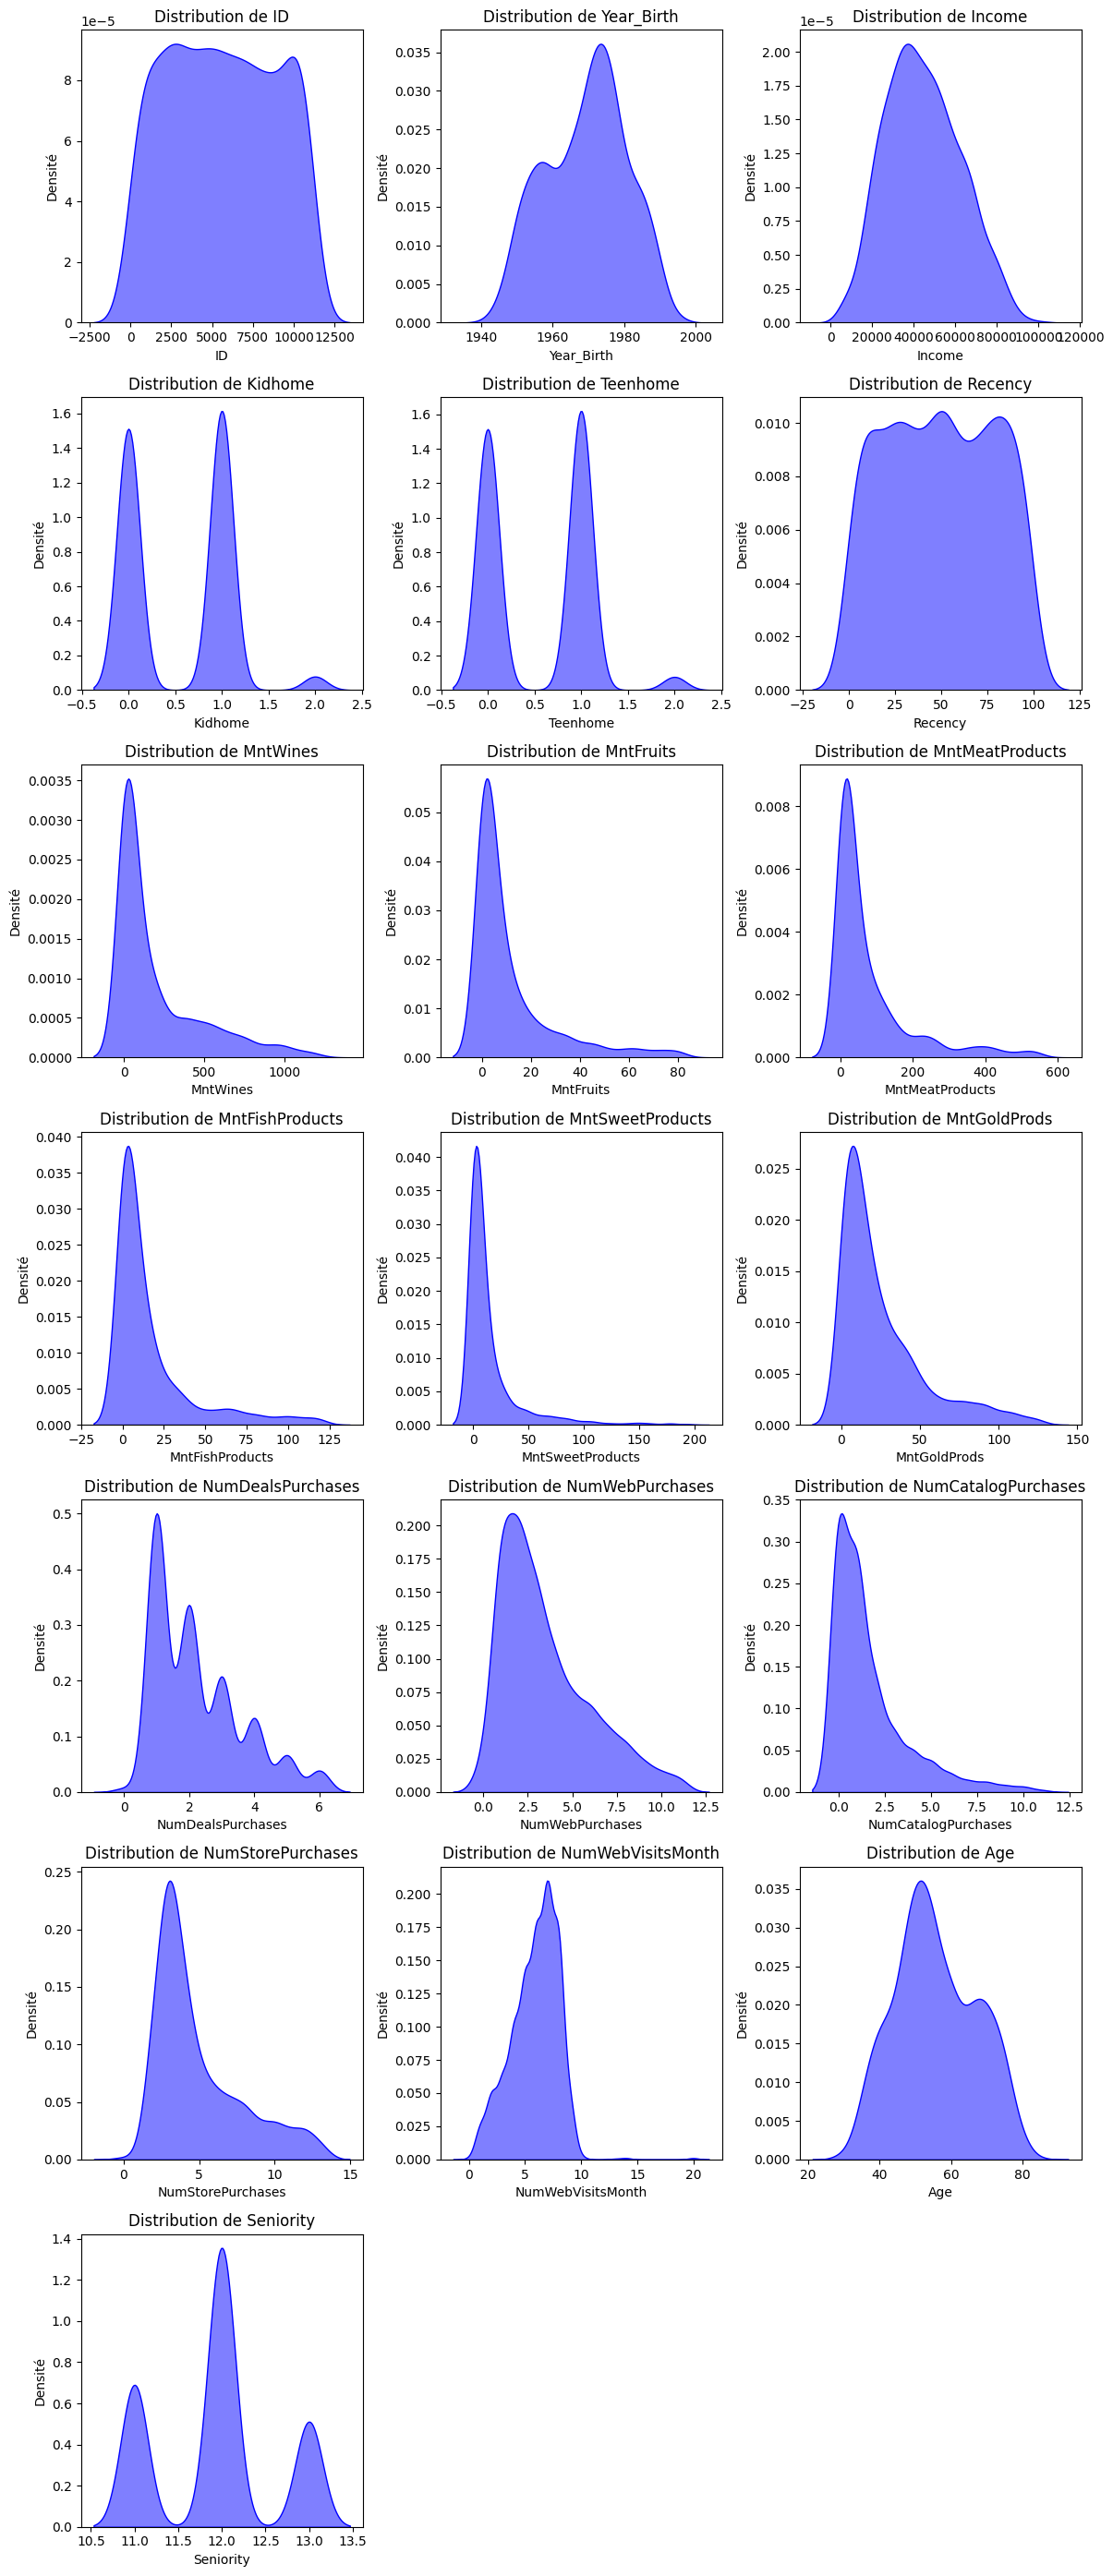

In [32]:
# Filtrer uniquement les colonnes numériques ayant plus de 2 valeurs uniques
numeric_columns = [
    col for col in df1_cleaned.select_dtypes(include=['number']).columns
    if df1_cleaned[col].nunique() > 2
]

# Vérifier qu'il reste des colonnes valides
if not numeric_columns:
    print("Aucune colonne valide pour le tracé des courbes !")
else:
    # Définir le nombre de colonnes et lignes pour l'affichage
    cols = 3  # Nombre de colonnes dans la grille
    rows = -(-len(numeric_columns) // cols)  # Arrondi vers le haut

    # Créer une figure avec plusieurs subplots
    fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))

    # Aplatir 'axes' pour éviter les erreurs d'indexation
    axes = axes.flatten() if len(numeric_columns) > 1 else [axes]

    # Boucle pour tracer une courbe de distribution pour chaque colonne sélectionnée
    for i, col in enumerate(numeric_columns):
        sns.kdeplot(df1_cleaned[col], ax=axes[i], fill=True, color="blue", alpha=0.5)
        axes[i].set_title(f"Distribution de {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Densité")


    # Supprimer les axes vides si le nombre de graphes est impair
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Ajuster l'affichage
    print("Distribution after cleaning the outliers :")
    plt.tight_layout()
    plt.show()

In [33]:
df1_cleaned = df1_cleaned.dropna()

In [34]:
# Normalisation des données
df1_scaled = df1_cleaned.copy()
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(df1_cleaned[features])
df1_scaled[df1_cleaned.select_dtypes(include=['number']).columns] = scaler.fit_transform(df1_cleaned.select_dtypes(include=['number']))

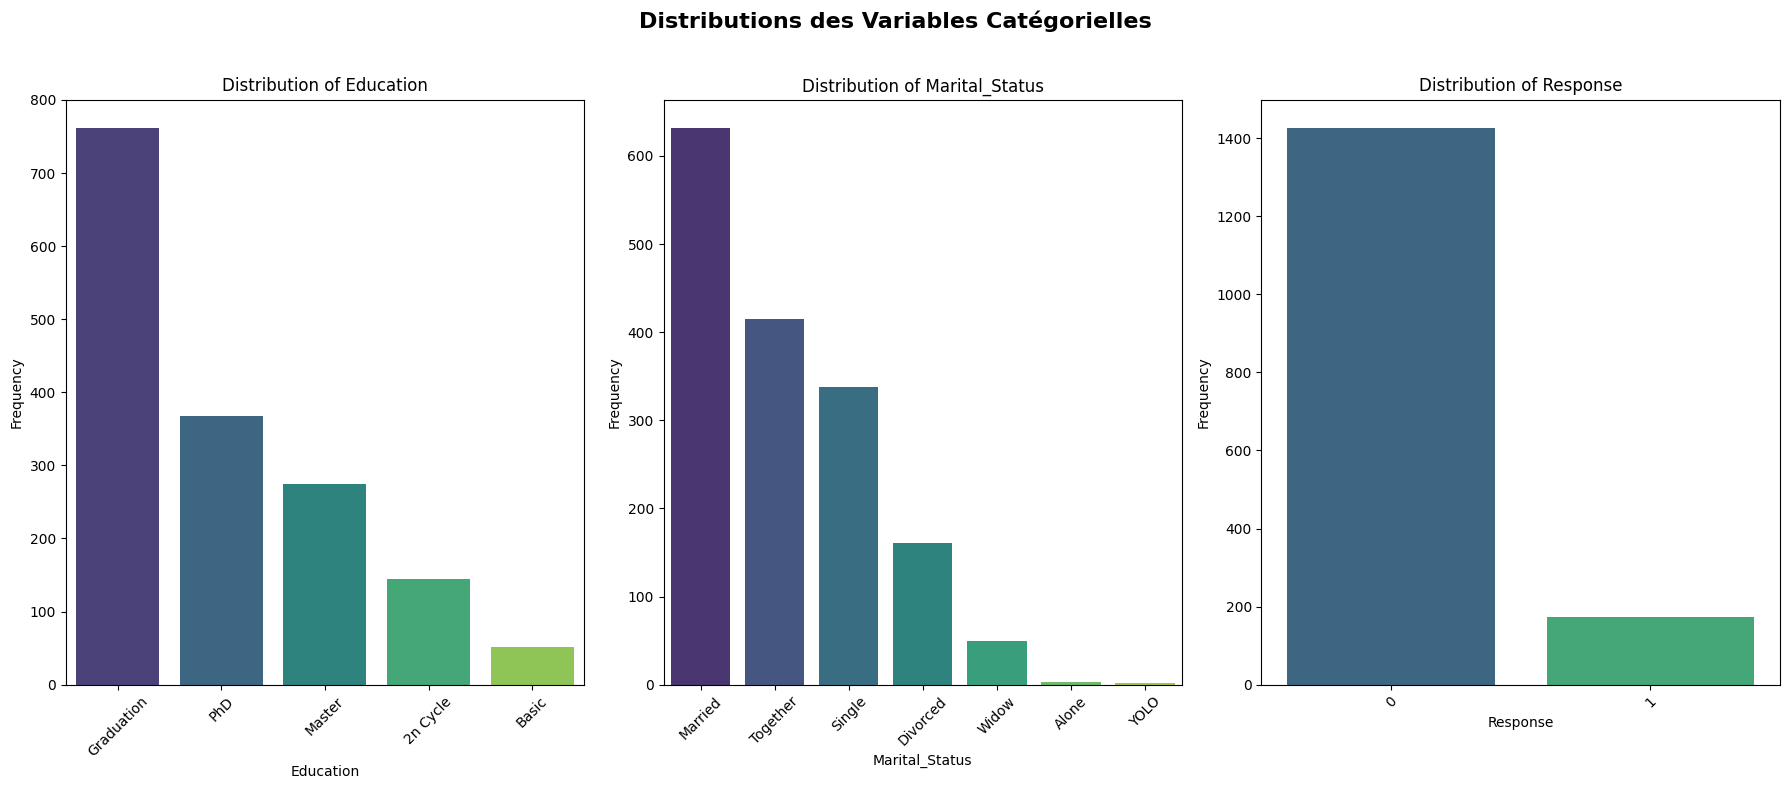

In [35]:
def plot_bar_chart(ax, df, variable):
    unique_values = df[variable].value_counts().index
    colors = sns.color_palette("viridis", len(unique_values))  # Palette Viridis

    sns.countplot(
        x=df[variable],
        order=unique_values,
        palette=colors,
        ax=ax
    )

    ax.set_title(f"Distribution of {variable}")
    ax.set_xlabel(variable)
    ax.set_ylabel("Frequency")
    ax.tick_params(axis='x', rotation=45)

# Sélection des variables catégorielles
cat_vars = df1_cleaned.select_dtypes(include=['object']).columns

# Création d'une grille pour afficher toutes les distributions
rows = 1
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 8))
fig.suptitle("Distributions des Variables Catégorielles", fontsize=16, fontweight='bold')

for ax, var in zip(axes.flatten(), cat_vars):
    plot_bar_chart(ax, df1_cleaned, var)



plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


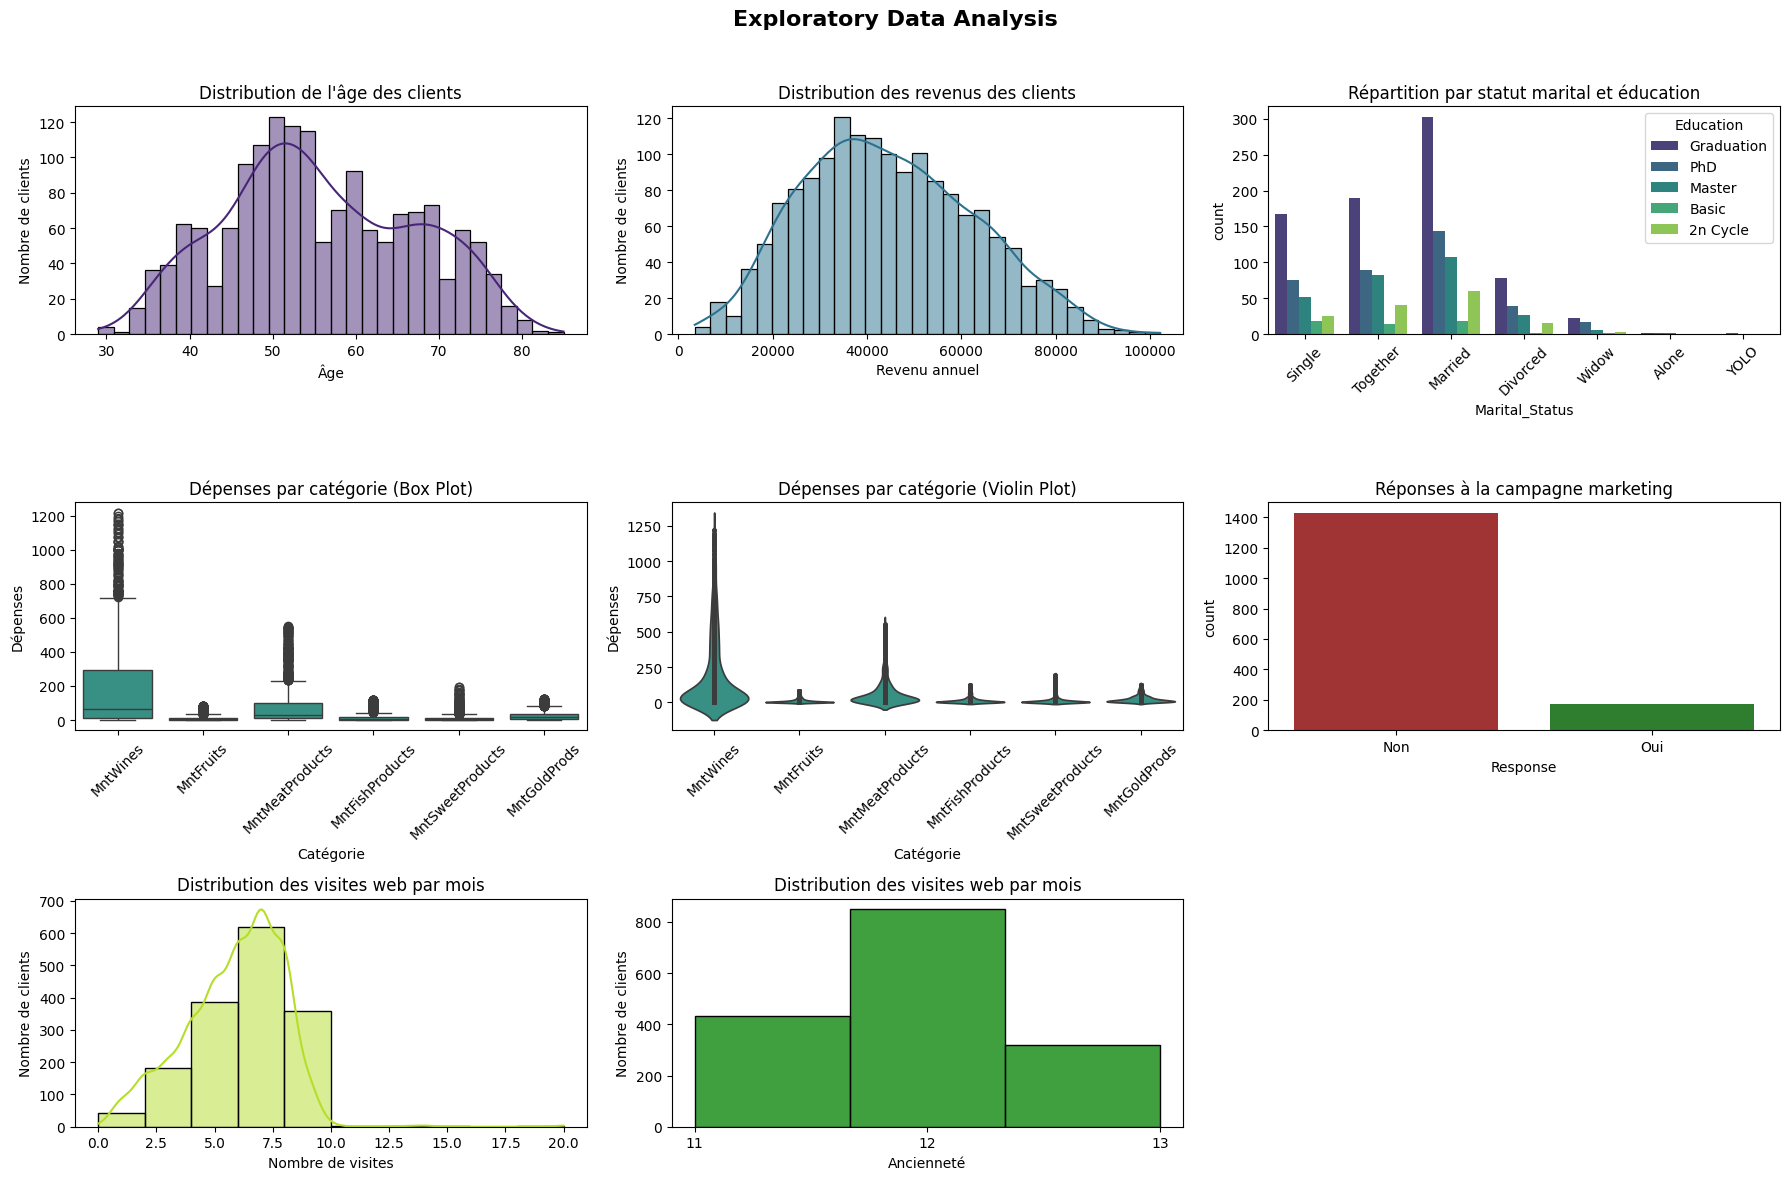

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création de la grille de sous-graphiques
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle("Exploratory Data Analysis", fontsize=16, fontweight='bold')

# Distribution de l'âge
sns.histplot(df1_cleaned['Age'], bins=30, kde=True, color='#482677', ax=axes[0, 0])
axes[0, 0].set_title("Distribution de l'âge des clients")
axes[0, 0].set_xlabel("Âge")
axes[0, 0].set_ylabel("Nombre de clients")

# Distribution du revenu
sns.histplot(df1_cleaned['Income'], bins=30, kde=True, color='#2C728E', ax=axes[0, 1])
axes[0, 1].set_title("Distribution des revenus des clients")
axes[0, 1].set_xlabel("Revenu annuel")
axes[0, 1].set_ylabel("Nombre de clients")

# Répartition par statut marital et éducation
sns.countplot(data=df1_cleaned, x='Marital_Status', hue='Education', palette='viridis', ax=axes[0, 2])
axes[0, 2].set_title("Répartition par statut marital et éducation")
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=45)

#  Dépenses moyennes par catégorie (Boxplot)
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df1_cleaned_melted = df1_cleaned.melt(value_vars=categories, var_name="Catégorie", value_name="Dépenses")

sns.boxplot(data=df1_cleaned_melted, x='Catégorie', y='Dépenses', color="#2A9D8F", ax=axes[1, 0])
axes[1, 0].set_title("Dépenses par catégorie (Box Plot)")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

#  Dépenses moyennes par catégorie (Violin plot)
sns.violinplot(data=df1_cleaned_melted, x='Catégorie', y='Dépenses', inner="point", scale="width", color="#2A9D8F", ax=axes[1, 1])
axes[1, 1].set_title("Dépenses par catégorie (Violin Plot)")
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

# Réponse aux campagnes marketing
sns.countplot(data=df1_cleaned, x='Response', palette={'0': "#B22222", '1': "#228B22"}, ax=axes[1, 2])
axes[1, 2].set_title("Réponses à la campagne marketing")
axes[1, 2].set_xticks([0, 1])
axes[1, 2].set_xticklabels(['Non', 'Oui'])

#  Nombre de visites web
sns.histplot(df1_cleaned['NumWebVisitsMonth'], bins=10, kde=True, color='#B5DE2B', ax=axes[2, 0])
axes[2, 0].set_title("Distribution des visites web par mois")
axes[2, 0].set_xlabel("Nombre de visites")
axes[2, 0].set_ylabel("Nombre de clients")

# Ancienneté
sns.histplot(df1_cleaned['Seniority'], bins=3, kde=False, color='green', ax=axes[2, 1])
axes[2, 1].set_title("Distribution des visites web par mois")
axes[2, 1].set_xlabel("Ancienneté")
axes[2, 1].set_ylabel("Nombre de clients")
# Définir une échelle de 1 en 1 sur l'axe X
axes[2, 1].set_xticks(np.arange(df1_cleaned['Seniority'].min(),
                                df1_cleaned['Seniority'].max() + 1,
                                1))


# 🔲 Suppression des sous-graphiques vides (car 3x3 = 9 places, mais 7 graphes)
axes[2, 2].axis('off')

# 🪄 Ajustement automatique de l'affichage
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [37]:
df1_cleaned = pd.get_dummies(df1_cleaned, columns=["Education", "Marital_Status","Response"], drop_first=True)


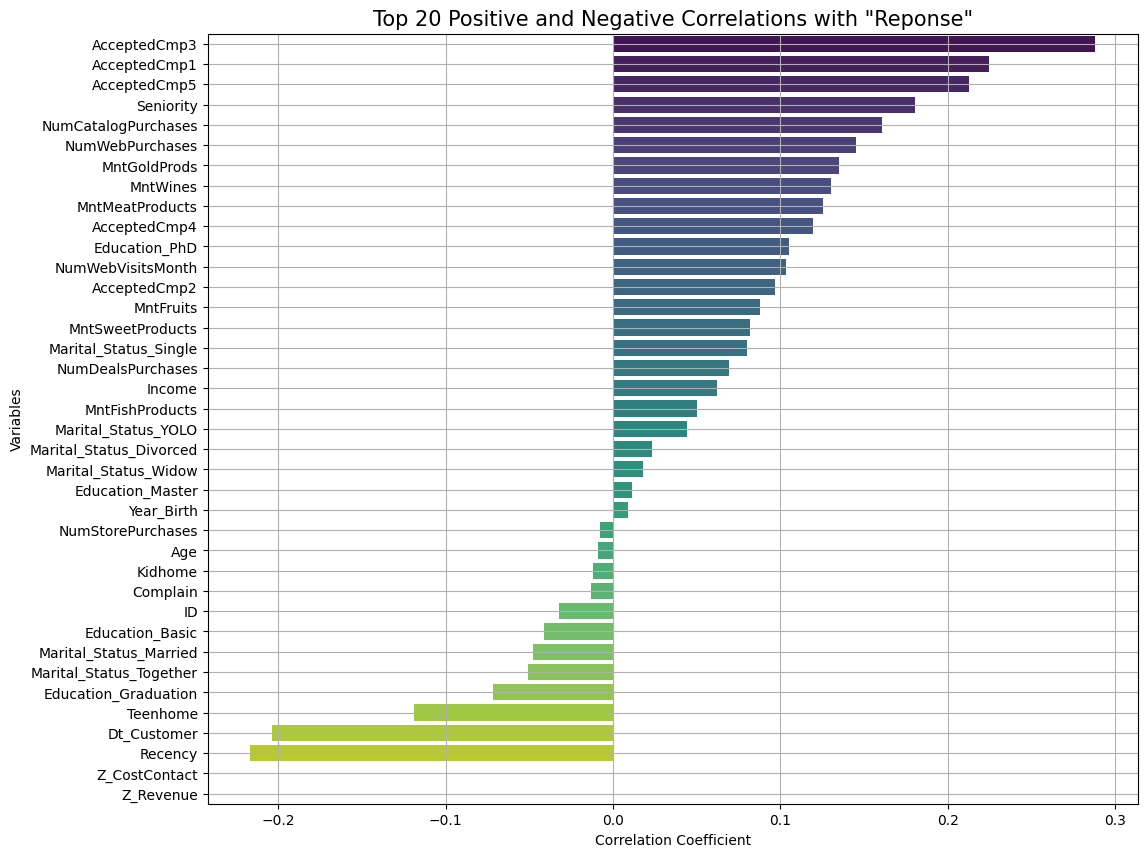

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul de la corrélation avec la variable cible 'Reponse'
correlation = df1_cleaned.corr()['Response_1'].sort_values(ascending=False)

# Sélection des 10 variables les plus positivement corrélées et 10 les plus négativement corrélées
# Exclure 'Reponse' elle-même en ne prenant pas la première corrélation
top_positive_correlated = correlation[1:21]  # 20 plus positives
top_negative_correlated = correlation[-20:]  # 20 plus négatives

# Combiner les deux séries pour le graphique
top_correlated_columns = pd.concat([top_positive_correlated, top_negative_correlated])

# Création d'un graphique en barres pour la visualisation
plt.figure(figsize=(12, 10))
sns.barplot(x=top_correlated_columns.values, y=top_correlated_columns.index, palette="viridis")

plt.title('Top 20 Positive and Negative Correlations with "Reponse"', fontsize=15)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.grid(True)
plt.show()

In [39]:
df1_cleaned = df1_cleaned.reset_index(drop=True)
skim(df1_cleaned)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1601   │ │ float64     │ 27    │                                                          │
│ │ Number of columns │ 39     │ │ bool        │ 11    │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column                ┃ NA  ┃ NA %  ┃ mean      ┃ sd      ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ID                    │   0 │     0 │      5600 │    3265 │    1 │  2804 │  5517 │  8430 │  11190 │ ▇█▇▇▇█ │  │
│ │ Year_Birth            │   0 │     0 │      1969 │   11.35 │ 1940 │  1960 │  1971 │  1977 │   1996 │ ▁▄▄█▄▁ │  │
│ │ Income                │   0 │     0 │     44570 │   17930 │ 3502 │ 30980 │ 43020 │ 57110 │ 102200 │ ▂▇█▆▂  │  │
│ │ Kidhome               │   0 │     0 │    0.5528 │  0.5442 │    0 │     0 │     1 │     1 │      2 │  ▇  █  │  │
│ │ Teenhome              │   0 │     0 │    0.5522 │  0.5431 │    0 │     0 │     1 │     1 │      2 │  ▇  █  │  │
│ │ Recency               │   0 │     0 │     49.08 │   29.05 │    0 │    24 │    49 │    75 │     99 │ █▇█▇▇█ │  │
│ │ MntWines              │   0 │     0 │     201.5 │   272.9 │    0 │    14 │    63 │   295 │   1218 │  █▁▁▁  │  │
│ │ MntFruits             │   0 │     0 │     11.55 │   17.07 │    0 │     1 │     4 │    14 │     81 │  █▁▁   │  │
│ │ MntMeatProducts       │   0 │     0 │     79.22 │   112.1 │    0 │    11 │    28 │    99 │    553 │  █▁▁   │  │
│ │ MntFishProducts       │   0 │     0 │      16.9 │   25.33 │    0 │     2 │     6 │    19 │    120 │   █▁   │  │
│ │ MntSweetProducts      │   0 │     0 │     14.52 │   26.61 │    0 │     1 │     4 │    14 │    195 │   █▁   │  │
│ │ MntGoldProds          │   0 │     0 │     25.34 │   26.85 │    0 │     6 │    15 │    36 │    126 │  █▃▁▁  │  │
│ │ NumDealsPurchases     │   0 │     0 │      2.24 │   1.367 │    0 │     1 │     2 │     3 │      6 │  █▅▃▂▂ │  │
│ │ NumWebPurchases       │   0 │     0 │     3.474 │     2.5 │    0 │     2 │     3 │     5 │     11 │ ▅█▄▃▁▁ │  │
│ │ NumCatalogPurchases   │   0 │     0 │     1.645 │   2.097 │    0 │     0 │     1 │     2 │     11 │  █▂▁   │  │
│ │ NumStorePurchases     │   0 │     0 │      4.92 │    2.87 │    0 │     3 │     4 │     6 │     13 │ ▂█▂▂▁▁ │  │
│ │ NumWebVisitsMonth     │   0 │     0 │     5.873 │   2.083 │    0 │     5 │     6 │     7 │     20 │  ▃██   │  │
│ │ AcceptedCmp3          │   0 │     0 │   0.06808 │   0.252 │    0 │     0 │     0 │     0 │      1 │ █    ▁ │  │
│ │ AcceptedCmp4          │   0 │     0 │   0.06496 │  0.2465 │    0 │     0 │     0 │     0 │      1 │ █    ▁ │  │
│ │ AcceptedCmp5          │   0 │     0 │   0.02936 │  0.1689 │    0 │     0 │     0 │     0 │      1 │   █    │  │
│ │ AcceptedCmp1          │   0 │     0 │   0.02936 │  0.1689 │    0 │     0 │     0 │     0 │      1 │   █    │  │
│ │ AcceptedCmp2          │   0 │     0 │  0.008745 │ 0.

In [40]:
df1_cleaned

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Response_1
0,2174.0,1954.0,46344.0,1.0,1.0,2014-03-08,38.0,11.0,1.0,6.0,...,True,False,False,False,False,True,False,False,False,False
1,4141.0,1965.0,71613.0,0.0,0.0,2013-08-21,26.0,426.0,49.0,127.0,...,True,False,False,False,False,False,True,False,False,False
2,6182.0,1984.0,26646.0,1.0,0.0,2014-02-10,26.0,11.0,4.0,20.0,...,True,False,False,False,False,False,True,False,False,False
3,5324.0,1981.0,58293.0,1.0,0.0,2014-01-19,94.0,173.0,43.0,118.0,...,False,False,True,False,True,False,False,False,False,False
4,7446.0,1967.0,62513.0,0.0,1.0,2013-09-09,16.0,520.0,42.0,98.0,...,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,8080.0,1986.0,26816.0,0.0,0.0,2012-08-17,50.0,5.0,1.0,6.0,...,True,False,False,False,False,True,False,False,False,False
1597,8372.0,1974.0,34421.0,1.0,0.0,2013-07-01,81.0,3.0,3.0,7.0,...,True,False,False,False,True,False,False,False,False,False
1598,7270.0,1981.0,56981.0,0.0,0.0,2014-01-25,91.0,908.0,48.0,217.0,...,True,False,False,True,False,False,False,False,False,False
1599,8235.0,1956.0,69245.0,0.0,1.0,2014-01-24,8.0,428.0,30.0,214.0,...,False,True,False,False,False,False,True,False,False,False


Strong Negative Correlation:

"Year_Birth" has a negative correlation with "Income" (-0.16), meaning that younger individuals tend to have lower incomes.
"Recency" does not show strong correlations with other variables, which suggests it may be independent of most purchasing behaviors.
Strong Positive Correlation:

"MntFruits," "MntMeatProducts," "MntFishProducts," and "MntSweetProducts" have strong positive correlations with each other (above 0.50), indicating that people who spend more on one category tend to spend more on others.
"NumWebPurchases" and "NumWebVisitsMonth" (0.50) suggest that customers who visit the website more frequently tend to make more online purchases.
Moderate Positive Correlation:

"Income" has a moderate correlation with total spending on different product categories (around 0.4–0.5), meaning higher-income individuals tend to spend more.
Weak or No Correlation:

Some variables like "Complain" and "AcceptedCmp" campaigns show very low correlations with other variables, indicating that customer complaints and past campaign acceptances do not significantly influence purchasing behavior.

==============================================================

## Part 2 : SOM/Clustering
==============================================================



In [42]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=7077da37287974c5ea6ac61a2bc0de3f15ec1e061eb3b5bd6b912e2321ea0d77
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


In [43]:
# Importation de MiniSom pour le SOM
from minisom import MiniSom

ImportError: cannot import name 'intp' from 'numpy._core' (/usr/local/lib/python3.11/dist-packages/numpy/_core/__init__.py)

In [ ]:

# Identifier les types de colonnes
num_cols = df1_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()  # Variables continues
bool_cols = df1_cleaned.select_dtypes(include=['bool']).columns.tolist()  # Variables booléennes (True/False)
binary_cols = [col for col in num_cols if df1_cleaned[col].nunique() == 2]  # Variables déjà binaires (0/1)

# Filtrer les variables continues à scaler (on exclut les binaires)
num_cols_to_scale = list(set(num_cols) - set(binary_cols))

# Appliquer StandardScaler uniquement aux variables continues
scaler = StandardScaler()
df1_scaled_num = scaler.fit_transform(df1_cleaned[num_cols_to_scale])

# Convertir les booléennes en 0/1 sans les scaler
df1_bool_binary = df1_cleaned[bool_cols + binary_cols].astype(int).values

# Concaténer les données transformées
df1_scaled = np.hstack((df1_scaled_num, df1_bool_binary))


In [ ]:
# 1️⃣ Définir la taille de la grille SOM
som_size_x, som_size_y = 10, 10  # Taille de la grille SOM (ajuste selon besoin)
som = MiniSom(som_size_x, som_size_y, df1_scaled.shape[1], sigma=1.0, learning_rate=0.5)

# 2️⃣ Initialiser et entraîner le SOM
som.random_weights_init(df1_scaled)
som.train_random(df1_scaled, 1000)  # 1000 itérations

# 3️⃣ Choisir 5 variables à visualiser
variables_to_plot = ['Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', "Kidhome", "Income", "Teenhome", "Age"]
var_indices = [df1_cleaned.columns.get_loc(var) for var in variables_to_plot]

# 4️⃣ Associer chaque point au neurone gagnant
winners = np.array([som.winner(d) for d in df1_scaled])  # Trouver les neurones gagnants

# 5️⃣ Tracer la grille SOM pour chaque variable
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # 2 lignes, 3 colonnes
axes = axes.flatten()  # Aplatir pour un accès plus facile

for i, var_idx in enumerate(var_indices):
    heatmap = np.zeros((som_size_x, som_size_y))  # Initialiser une matrice vide

    # Remplir la heatmap avec les valeurs moyennes des neurones gagnants
    for (x, y), val in zip(winners, df1_scaled[:, var_idx]):
        heatmap[x, y] += val

    # Tracer la carte de chaleur
    ax = axes[i]
    c = ax.pcolor(heatmap.T, cmap="coolwarm", edgecolors='k', linewidths=0.5)
    fig.colorbar(c, ax=ax)
    ax.set_title(f"SOM pour {variables_to_plot[i]}")

# Supprimer le dernier subplot vide s'il y en a un
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='coolwarm', edgecolors='k', linewidths=0.5)
plt.colorbar(label='Distance entre les neurones')
plt.title("Carte des distances U-Matrix du SOM")
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.patches import Circle

# 4️⃣ Récupérer les poids des neurones (Codes des clusters)
codes = np.array([som.get_weights()[i][j] for i in range(som_size_x) for j in range(som_size_y)])

# 5️⃣ Trouver le nombre optimal de clusters avec la methode du coude
model = KMeans(n_init=50)  # n_init pour éviter les warnings
visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion')
visualizer.fit(codes)
visualizer.show()

# 6️⃣ Appliquer K-Means sur les poids des neurones
n_clusters = 4  # Choisi à partir du graphe elbow
kmeans = KMeans(n_clusters=n_clusters, n_init=50, random_state=123)
clusters = kmeans.fit_predict(codes)

# 7️⃣ Assigner chaque individu à un cluster en fonction du neurone gagnant
winners = np.array([som.winner(d) for d in df1_scaled])  # Trouver le neurone gagnant
winners_idx = [x * som_size_y + y for x, y in winners]  # Convertir en index unique
data_clusters = np.array([clusters[idx] for idx in winners_idx])  # Assigner les clusters K-Means

# 8️⃣ Ajouter les clusters aux données originales
df1_cleaned["Cluster"] = data_clusters

# 6️⃣ Visualisation avec des ronds (effet "yeux")
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-0.5, som_size_x - 0.5)
ax.set_ylim(-0.5, som_size_y - 0.5)
ax.set_xticks(range(som_size_x))
ax.set_yticks(range(som_size_y))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)

# Palette de couleurs pour les clusters
colors = ["red", "blue", "green", "purple", "orange"]

# Ajouter les neurones sous forme de cercles colorés
for i in range(som_size_x):
    for j in range(som_size_y):
        idx = i * som_size_y + j  # Index unique du neurone
        cluster_id = clusters[idx]  # Cluster du neurone
        color = colors[cluster_id]  # Couleur du cluster

        # Dessiner un cercle coloré
        circle = Circle((i, j), radius=0.4, color=color, ec="black", lw=1.5)
        ax.add_patch(circle)

# Ajouter les individus sur leur neurone gagnant
for (x, y), cluster in zip(winners, data_clusters):
    ax.text(x, y, str(cluster), color="white", ha="center", va="center", fontsize=12, fontweight="bold")

ax.set_title("Carte SOM avec K-Means (Clusters colorés)")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
# Réduction de dimension avec PCA pour visualisation en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df1_scaled)
# Définir le nombre de clusters (par ex. K=3)
k = 4
kmeans = KMeans(n_clusters=k, n_init=50, random_state=123)
df1_cleaned['Cluster'] = kmeans.fit_predict(X_pca)  # Ajouter les labels de clusters au DataFrame

# Visualisation des clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df1_cleaned['Cluster'], cmap='viridis', edgecolors='k')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualisation des clusters K-Means")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
# Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_ * 100  # En pourcentage
print(f"Variance expliquée par PCA1 : {explained_variance[0]:.2f}%")
print(f"Variance expliquée par PCA2 : {explained_variance[1]:.2f}%")
print(f"Variance cumulée (PCA1 + PCA2) : {explained_variance.sum():.2f}%")

In [ ]:

df1_cleaned.groupby('Cluster')[['Kidhome', 'Teenhome', 'Seniority']].mean()


In [ ]:
df1_cleaned.columns

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Colonnes à visualiser
cols = ['Income', 'Kidhome','Teenhome','Recency','MntWines', 'MntFruits',
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds','NumDealsPurchases', 'NumWebPurchases',
        'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth',
        'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1',
        'AcceptedCmp2','Complain','Z_CostContact','Z_Revenue','Age',
        'Seniority','Education_Basic','Education_Graduation',
        'Education_Master','Education_PhD','Marital_Status_Divorced',
        'Marital_Status_Married','Marital_Status_Single',
        'Marital_Status_Together','Marital_Status_Widow',
        'Marital_Status_YOLO','Response_1']

# Moyennes par cluster
cluster_means = df1_cleaned.groupby('Cluster')[cols].mean().reset_index()

# Configuration de la grille
plt.figure(figsize=(20, 25))
rows = 8  # Nombre de lignes
cols_per_row = 5  # Nombre de colonnes par ligne

for i, col in enumerate(cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.barplot(data=cluster_means, x='Cluster', y=col, palette='viridis')
    plt.title(f'Moyenne de {col} par Cluster', fontsize=8)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)

plt.suptitle('Moyennes par Cluster - Variables clés', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


Cluster 1 : education basic/ kidhome/ income faible, campagne 'non' sauf la campagne 3/ se plaignent souvent/ jeune (45), depense peu
Cluster 2 : ado a la maison/ se plaignent peu/ vieux (60+)/ haut etude : MASTER ou PHD/
Cluster 3 : Reponse oui bcq, les plus riches, depense bcq, visite peu le site web , accepte bcq les campagnes,
Cluster 4 : depense peu aussi,vieux aussi,

## =======================================================
## Part 3 : Modelisation/Prediction
## ========================================================

# 1) Regression Logistique

In [44]:
# Drop les colonnes useless
df1_cleaned = df1_cleaned.drop(columns=['ID', 'Dt_Customer', 'Year_Birth'])

In [45]:
from sklearn.model_selection import train_test_split

# Supposons que 'transformed_data' soit votre jeu de données et 'Reponse' la variable cible
X = df1_cleaned.drop('Response_1', axis=1)  # Caractéristiques
y = df1_cleaned['Response_1']               # Cible

# Division des données en ensembles d'entraînement et de test, avec stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score


0.8877338877338877
[[423   6]
 [ 48   4]]
              precision    recall  f1-score   support

       False       0.90      0.99      0.94       429
        True       0.40      0.08      0.13        52

    accuracy                           0.89       481
   macro avg       0.65      0.53      0.53       481
weighted avg       0.84      0.89      0.85       481



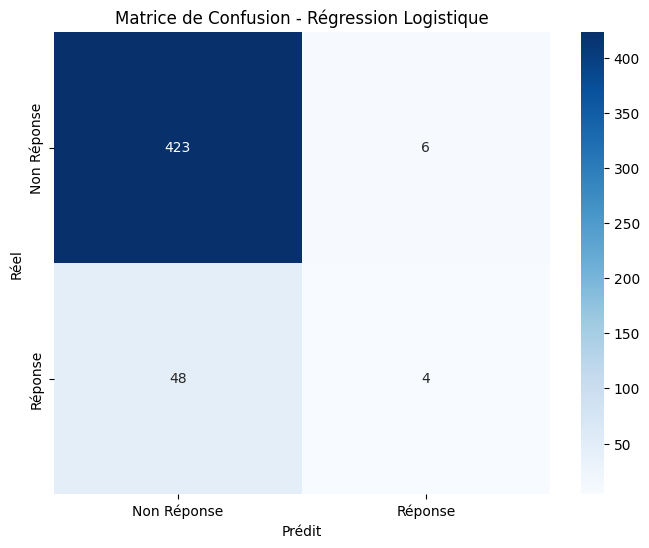

In [47]:
from sklearn.linear_model import LogisticRegression
# Création du modèle de régression logistique
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Entraînement du modèle avec l'ensemble d'entraînement
logistic_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = logistic_model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy)
print(conf_matrix)
print(class_report)

# Création d'un heatmap pour la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Réponse', 'Réponse'], yticklabels=['Non Réponse', 'Réponse'])
plt.title('Matrice de Confusion - Régression Logistique')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

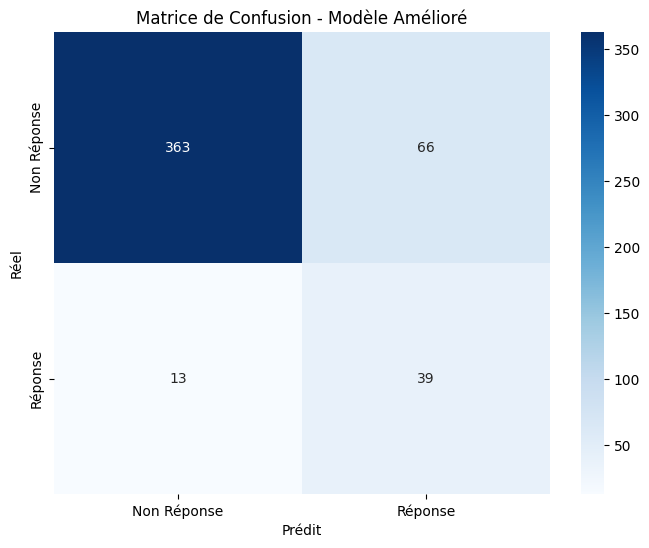

Accuracy : 0.8357588357588358
Rapport de classification :               precision    recall  f1-score   support

       False       0.97      0.85      0.90       429
        True       0.37      0.75      0.50        52

    accuracy                           0.84       481
   macro avg       0.67      0.80      0.70       481
weighted avg       0.90      0.84      0.86       481



In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Définition des hyperparamètres pour la recherche en grille
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Valeurs de régularisation
    'solver': ['lbfgs', 'liblinear']  # Solveurs
}

# Création du modèle de régression logistique pour la recherche en grille
logistic_model_grid = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

# Recherche en grille avec validation croisée
grid_search = GridSearchCV(logistic_model_grid, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Meilleurs paramètres
best_params = grid_search.best_params_

# Réentraînement du modèle avec les meilleurs hyperparamètres
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Prédiction et évaluation sur l'ensemble de test
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

# Génération de la matrice de confusion améliorée
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Réponse', 'Réponse'], yticklabels=['Non Réponse', 'Réponse'])
plt.title('Matrice de Confusion - Modèle Amélioré')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

# Affichage des résultats
print('Accuracy :', accuracy_best)
print('Rapport de classification :', class_report_best)

# Prédiction des probabilités pour la classe positive
y_proba_best = best_model.predict_proba(X_test)[:, 1]

# Calcul des taux de vrais positifs et de faux positifs
fpr, tpr, thresholds = roc_curve(y_test, y_proba_best)

# Calcul de l'AUC
auc_score = roc_auc_score(y_test, y_proba_best)

## RANDOM FOREST :

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Meilleurs paramètres : {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


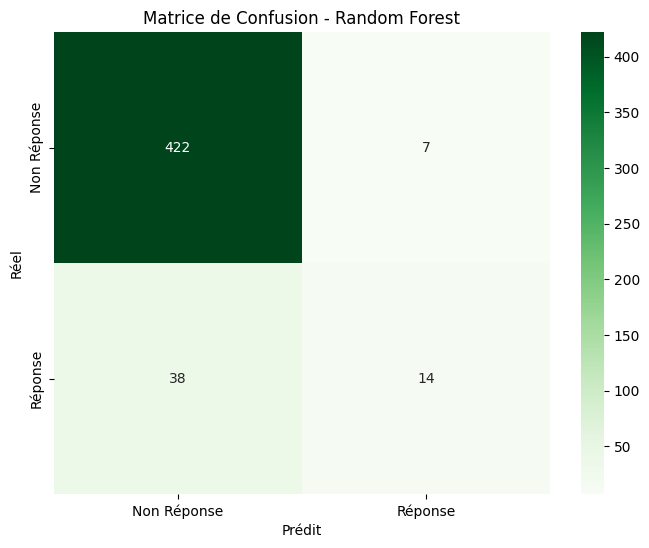

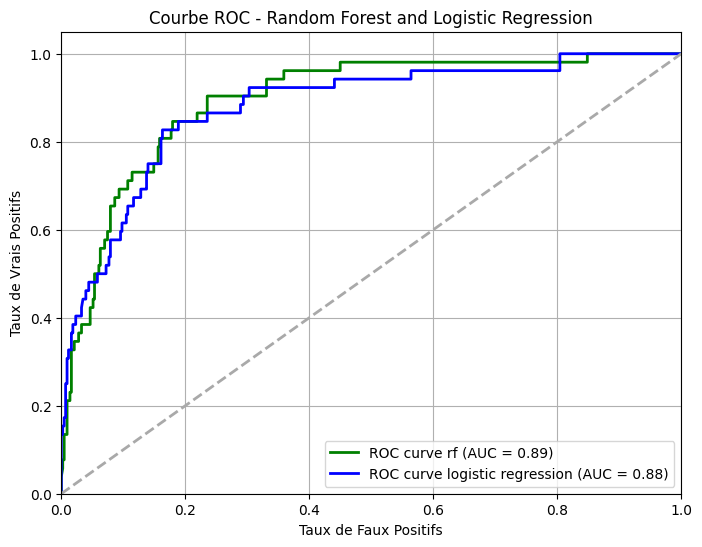

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Définition des hyperparamètres pour la recherche en grille
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Création du modèle Random Forest
rf_model = RandomForestClassifier(random_state=42,
                                  class_weight='balanced')
#balanced pour calculer équilibrer les poids en fonction de la fréquence des classes (classe minoritaire aura un poids plus important)

# Recherche en grille avec validation croisée
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)

# Entraînement
grid_search.fit(X_train, y_train)

# Meilleurs paramètres
best_params = grid_search.best_params_
print(f"Meilleurs paramètres : {best_params}")

# Meilleur modèle
best_model = grid_search.best_estimator_

# Prédictions
y_pred_best = best_model.predict(X_test)

# Évaluation
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)


# Matrice de Confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Non Réponse', 'Réponse'],
            yticklabels=['Non Réponse', 'Réponse'])
plt.title('Matrice de Confusion - Random Forest')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

# Courbe ROC
y_proba_best = best_model.predict_proba(X_test)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_proba_best)
auc_score1 = roc_auc_score(y_test, y_proba_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='green', lw=2, label=f'ROC curve rf (AUC = {auc_score1:.2f})')
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve logistic regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='darkgrey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC - Random Forest and Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [50]:
# Affichage des résultats
print(f"Précision (Accuracy) : {accuracy_best}")
print(class_report_best)

Précision (Accuracy) : 0.9064449064449065
              precision    recall  f1-score   support

       False       0.92      0.98      0.95       429
        True       0.67      0.27      0.38        52

    accuracy                           0.91       481
   macro avg       0.79      0.63      0.67       481
weighted avg       0.89      0.91      0.89       481



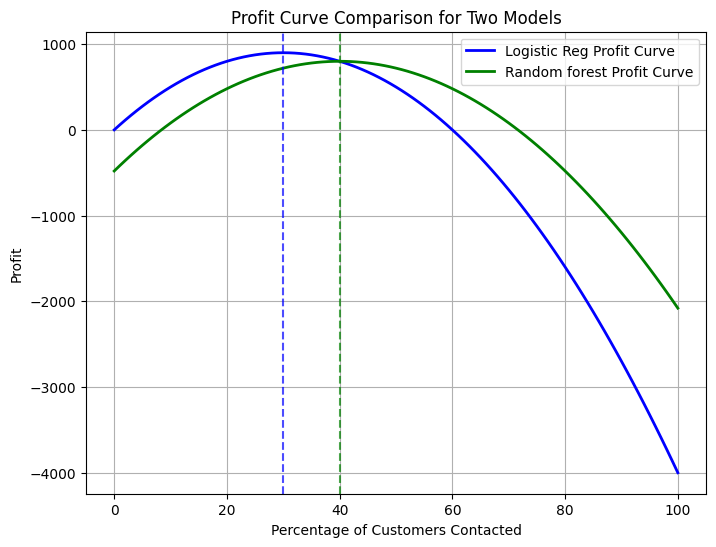

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of customers contacted (as a percentage)
contact_pct = np.linspace(0, 100, 101)

# Example profit functions for two models:
# Model 1: Peak profit at 30% of customers contacted
profit_model1 = -1 * (contact_pct - 30)**2 + 900  # Parabolic function with maximum profit of 900 at 30%
# Model 2: Peak profit at 40% of customers contacted, but with a lower maximum profit
profit_model2 = -0.8 * (contact_pct - 40)**2 + 800  # Parabolic function with maximum profit of 800 at 40%

# Plotting the profit curves
plt.figure(figsize=(8, 6))
plt.plot(contact_pct, profit_model1, label='Logistic Reg Profit Curve', color='blue', linewidth=2)
plt.plot(contact_pct, profit_model2, label='Random forest Profit Curve', color='green', linewidth=2)

# Highlight the optimal contact percentages
plt.axvline(x=30, color='blue', linestyle='--', alpha=0.7)
plt.axvline(x=40, color='green', linestyle='--', alpha=0.7)

plt.xlabel('Percentage of Customers Contacted')
plt.ylabel('Profit')
plt.title('Profit Curve Comparison for Two Models')
plt.legend()
plt.grid(True)
plt.show()
